# Analisis Inflasi di Indonesia pada sektor Pendidikan, Rekreasi dan Olahraga menggunakan Seasonal ARIMA

data [Data inflasi indonesia menurut kelompok pengeluaran 2006-2019](https://www.bps.go.id/id/statictable/2009/06/29/901/inflasi-indonesia-menurut-kelompok-pengeluaran-2006-2019.html)

## Langkah 1: Import Dataset

In [55]:
library(readxl) #membaca data excel
library(tseries) #package timeseries
library(lmtest) #untuk coeftest
library(forecast) #untuk accuracy dan prediksi
library(TSA) #untuk eacf pada penentuan model

data <- read_excel("fix_2.xlsx") #import data

## Langkah 2 : Identifikasi Model

In [56]:
data <- ts(data, frequency = 12, start = c(2008, 1))
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,0.01,0.04,0.09,0.13,0.37,0.44,1.74,1.36,0.63,0.39,0.26,0.16
2009,0.12,0.04,0.06,0.05,0.07,0.09,1.21,1.26,0.43,0.34,0.13,0.01
2010,0.10,0.07,0.02,0.01,0.02,0.06,0.86,1.27,0.26,0.44,0.08,0.07
2011,0.42,0.13,0.17,0.08,0.03,0.18,0.97,2.14,0.54,0.30,0.04,0.07
2012,0.15,0.08,0.07,0.06,0.02,0.11,0.56,1.70,1.07,0.21,0.06,0.05
2013,0.05,0.19,0.12,0.15,0.06,0.04,0.69,1.36,0.71,0.31,0.11,0.06
2014,0.28,0.17,0.14,0.24,0.07,0.08,0.45,1.58,0.68,0.23,0.08,0.36
2015,0.26,0.14,0.10,0.05,0.06,0.07,0.34,1.72,0.89,0.16,0.05,0.06


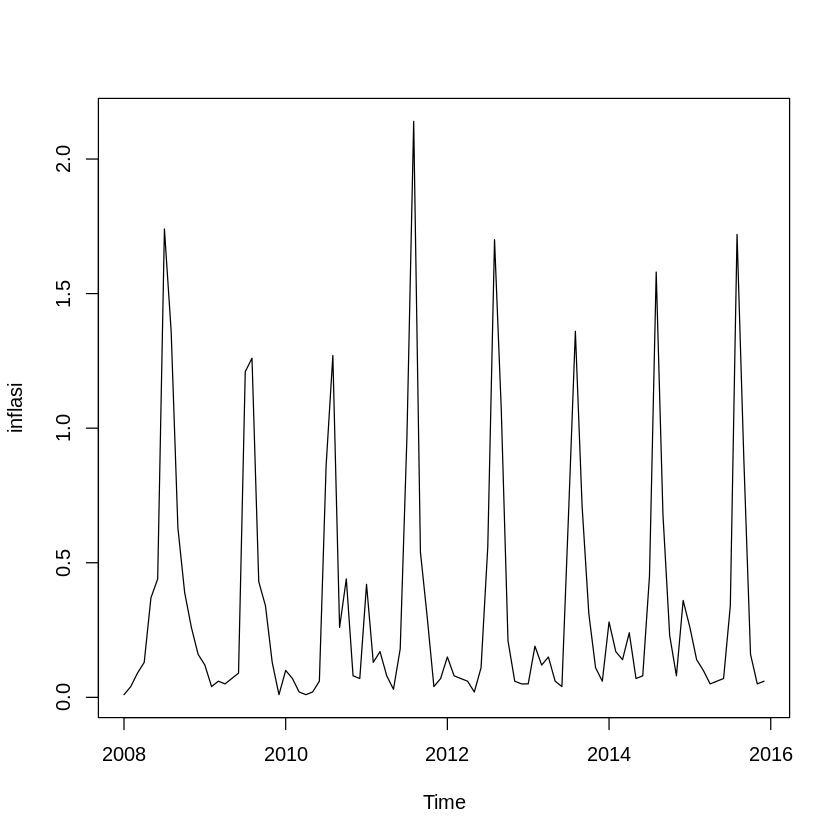

In [57]:
plot.ts(data) #melihat plot dari data

## Langkah 3: Cek Stasioner Mean dan Varians


### Cek stasioner data

In [58]:
adf_result <- adf.test(data)
adf_result

Warning message in adf.test(data):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -5.5474, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


> Karena nilai p-value \< alpha = 0.05 maka Terima H0 atau data sudah stasioner

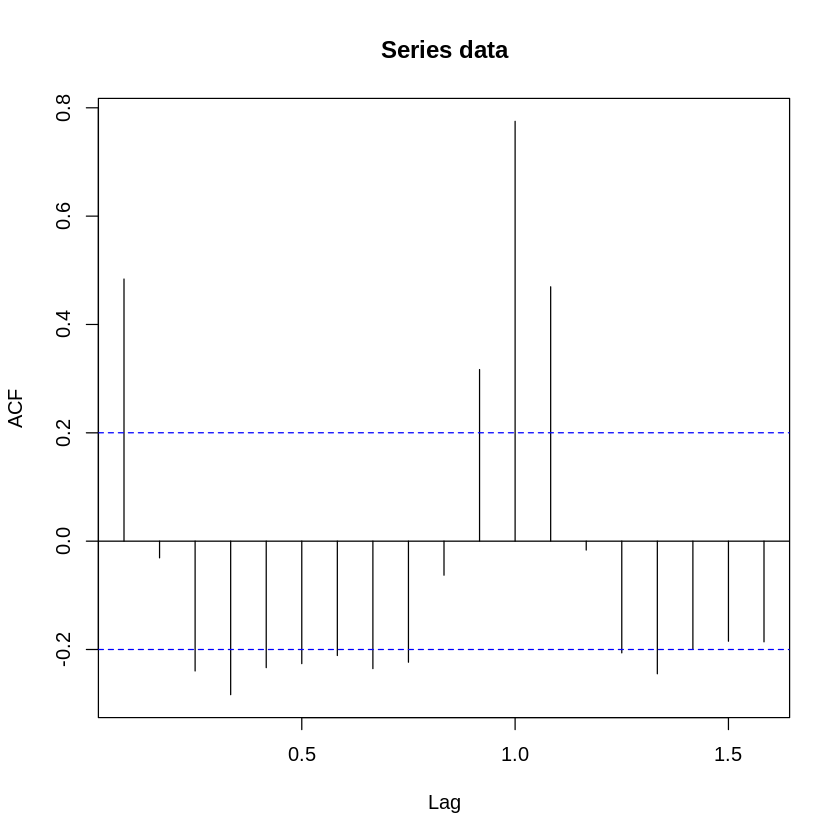

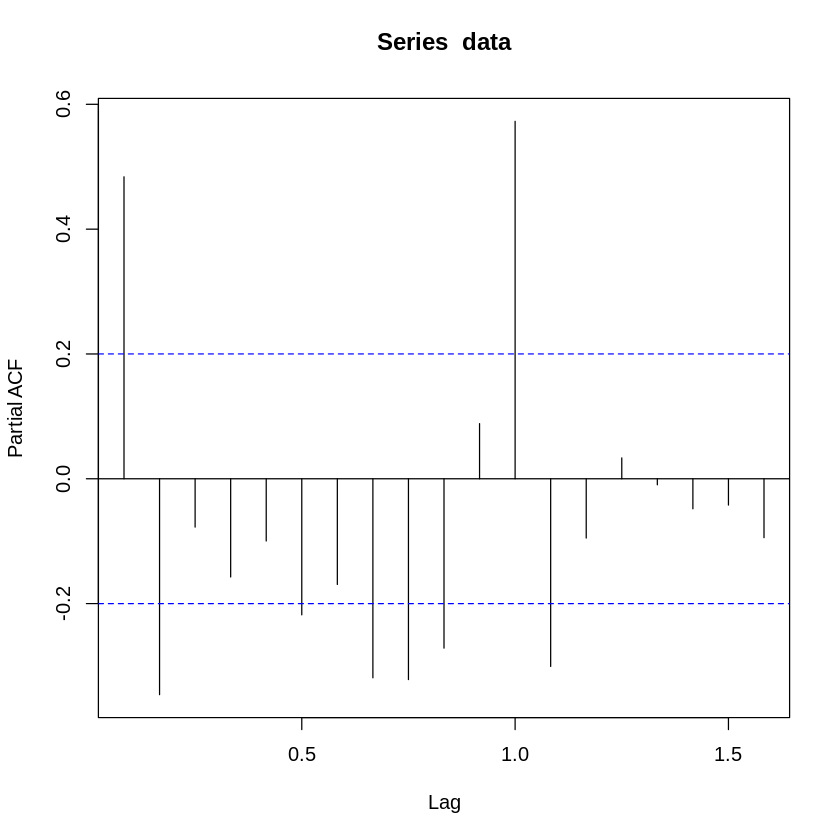

In [59]:
acf(data)
pacf(data)

## SARIMA

### Langkah 4 : Menentukan Orde SARIMA (p,d,q) x (P,D,Q)s

In [60]:
auto.arima(data)

Series: data 
ARIMA(1,0,0)(1,1,2)[12] 

Coefficients:
         ar1     sar1    sma1     sma2
      0.1819  -0.5981  0.4377  -0.3732
s.e.  0.1099   0.3789  0.4722   0.1726

sigma^2 = 0.03387:  log likelihood = 22.81
AIC=-35.62   AICc=-34.85   BIC=-23.46

In [61]:
eacf(data)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o x x x x o x x o x  x  x  o 
1 x o o o o o o o o o o  x  x  o 
2 x x o o o o o o o o o  x  o  x 
3 x x o o o o o o o o o  x  x  x 
4 x x o o o o o o o o o  x  o  x 
5 x x o o o o o o o o o  x  o  x 
6 x x o o o o o o o o o  x  x  x 
7 x x o o o o o o o o o  x  o  x 


In [66]:
dugaan1 = arima(data, orde=c(1,0,0), seasonal=list(order=c(0,1,1),period=12), method="CSS")
coeftest(dugaan1)
summary(dugaan1)

dugaan2 = arima(data, orde=c(0,0,1), seasonal=list(order=c(0,1,1),period=12), method="CSS")
coeftest(dugaan2)
summary(dugaan2)

dugaan3 = arima(data, orde=c(0,0,0), seasonal=list(order=c(2,1,0),period=12), method="CSS")
coeftest(dugaan3)
summary(dugaan3)

dugaan4 = arima(data, orde=c(5,1,4), seasonal=list(order=c(3,1,3),period=12), method="CSS")
coeftest(dugaan4)
summary(dugaan4)


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)  
ar1   0.20804    0.10772  1.9313  0.05344 .
sma1 -0.25620    0.11959 -2.1423  0.03217 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = data, order = c(1, 0, 0), seasonal = list(order = c(0, 1, 1), period = 12), 
    method = "CSS")

Coefficients:
         ar1     sma1
      0.2080  -0.2562
s.e.  0.1077   0.1196

sigma^2 estimated as 0.03649:  part log likelihood = 19.85

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)  
ma1   0.18280    0.10255  1.7825  0.07467 .
sma1 -0.25116    0.12086 -2.0781  0.03770 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = data, order = c(0, 0, 1), seasonal = list(order = c(0, 1, 1), period = 12), 
    method = "CSS")

Coefficients:
         ma1     sma1
      0.1828  -0.2512
s.e.  0.1026   0.1209

sigma^2 estimated as 0.03647:  part log likelihood = 19.88

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
sar1 -0.359865   0.098565 -3.6511 0.0002612 ***
sar2 -0.347627   0.092560 -3.7557 0.0001729 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = data, order = c(0, 0, 0), seasonal = list(order = c(2, 1, 0), period = 12), 
    method = "CSS")

Coefficients:
         sar1     sar2
      -0.3599  -0.3476
s.e.   0.0986   0.0926

sigma^2 estimated as 0.03324:  part log likelihood = 23.78

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

Warning message in sqrt(diag(se)):
“NaNs produced”



z test of coefficients:

      Estimate Std. Error  z value  Pr(>|z|)    
ar1  -0.345242        NaN      NaN       NaN    
ar2  -0.470289        NaN      NaN       NaN    
ar3  -0.188517        NaN      NaN       NaN    
ar4  -0.111257   0.129907  -0.8564    0.3918    
ar5   0.025122        NaN      NaN       NaN    
ma1  -0.410707        NaN      NaN       NaN    
ma2  -0.614409        NaN      NaN       NaN    
ma3   0.057511        NaN      NaN       NaN    
ma4  -0.427140        NaN      NaN       NaN    
sar1 -0.372389   0.048410  -7.6923 1.445e-14 ***
sar2 -0.729424   0.059607 -12.2372 < 2.2e-16 ***
sar3  0.059811   0.010407   5.7472 9.071e-09 ***
sma1 -0.075070   0.128648  -0.5835    0.5595    
sma2  0.587136   0.149591   3.9249 8.675e-05 ***
sma3 -0.010463   0.157718  -0.0663    0.9471    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”
Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = data, order = c(5, 1, 4), seasonal = list(order = c(3, 1, 3), period = 12), 
    method = "CSS")

Coefficients:
          ar1      ar2      ar3      ar4     ar5      ma1      ma2     ma3
      -0.3452  -0.4703  -0.1885  -0.1113  0.0251  -0.4107  -0.6144  0.0575
s.e.      NaN      NaN      NaN   0.1299     NaN      NaN      NaN     NaN
          ma4     sar1     sar2    sar3     sma1    sma2     sma3
      -0.4271  -0.3724  -0.7294  0.0598  -0.0751  0.5871  -0.0105
s.e.      NaN   0.0484   0.0596  0.0104   0.1286  0.1496   0.1577

sigma^2 estimated as 0.01439:  part log likelihood = 58.25

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

> dugaan 4 memiliki akurasi yang paling baik, terlihat pada MAPE yang dihasilkan yaitu 17.56525%, yang berarti tingkat kesalahan prediksi hanya terpaut 17,5%

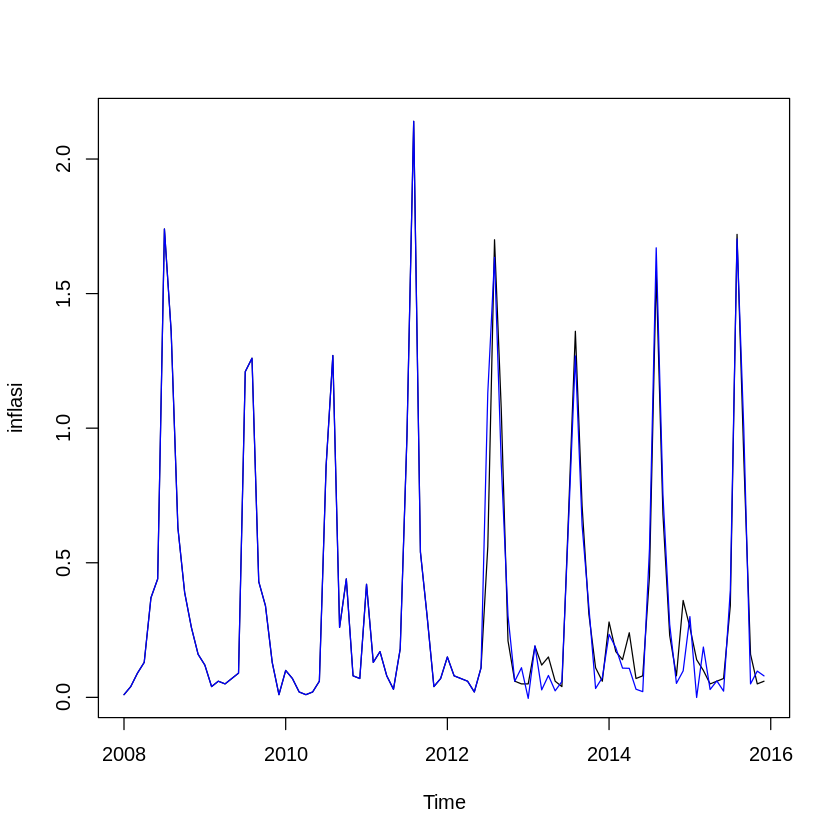

In [63]:
plot(data)
lines(fitted(dugaan4),col='blue')

## Langkah 5 : Uji Diagnosa Model

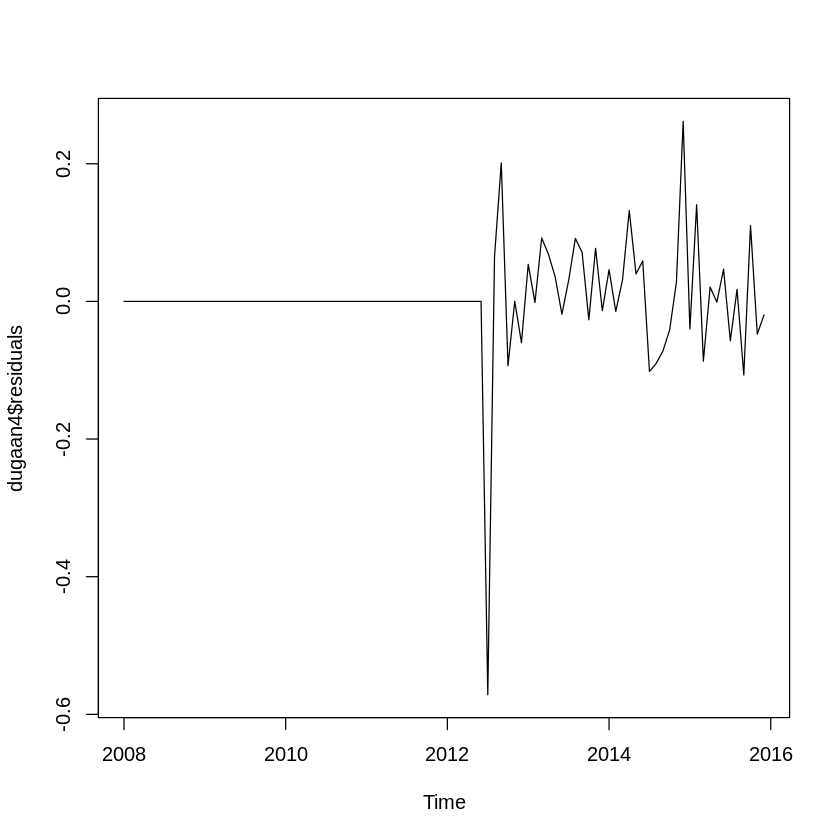


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1)(0,1,1)[12]
Q* = 12.986, df = 17, p-value = 0.7371

Model df: 2.   Total lags used: 19



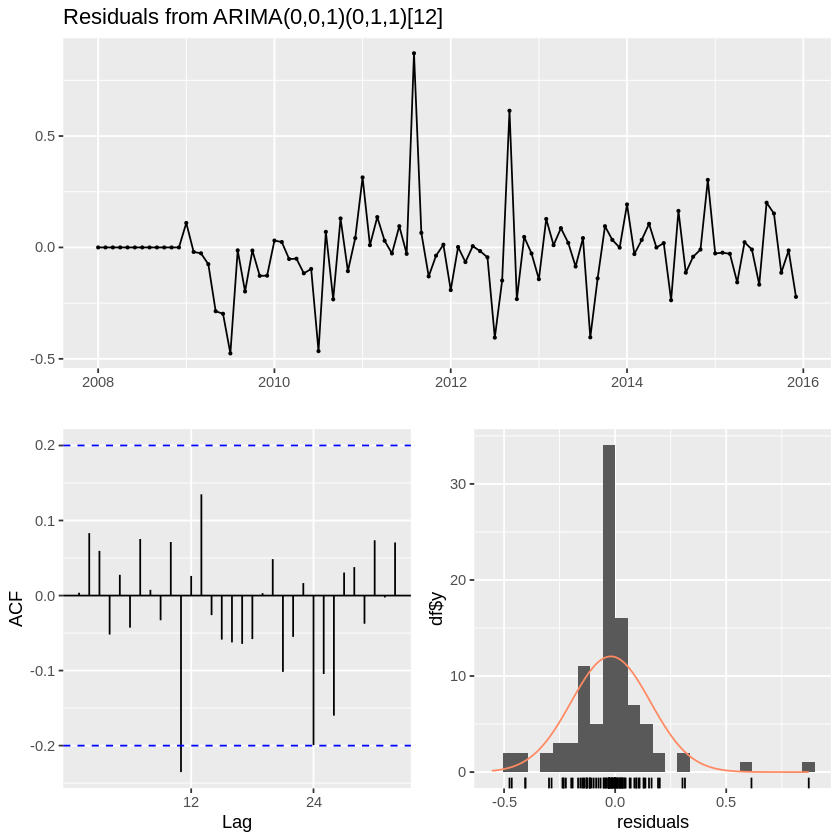

In [64]:
#Plot Residual
ts.plot(dugaan4$residuals)
checkresiduals(dugaan2,plot=T)

## Peramalan

In [65]:
nilaiprediksi4 <- forecast(dugaan4, h = 3)
plot(nilaiprediksi4)
nilaiprediksi4

Warning message in predict.Arima(object, n.ahead = h):
“MA part of model is not invertible”


ERROR: ignored